This notebook demonstrates how to simulate quantum states, measurements and operations in Qiskit. It follows [the tutorial](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems#states-measurements-and-operations) at the end of [Lesson 01 (Single Systems)](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems).

Firstly, we'll import the relevant libraries and define some state vectors.

In [45]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

## State vectors
We can create quantum state vectors easily using Qiskit's `Statevector` class.

In [46]:
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])  # (This is the |+⟩ ('ket plus') state vector.)
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

We can display these state vectors as a single line, in more easily readable LaTeX format, or as LaTeX source code. For example, we can display the `u` state vector in all three ways:

In [47]:
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


We can also check whether a state vector is valid by calling the `Statevector.is_valid()` method on it. Remember that the criterion for a state vector to be valid is that its Euclidean norm equals 1.

In [48]:
display(u.is_valid())  # u is a valid state vector
display(w.is_valid())  # w is not a valid state vector

True

False

## Measurements
We can use the `Statevector.measure()` method to perform a measurement on a state vector. For example, for the state vector `v` that we defined previously,

In [49]:
display(v.draw("latex"))

<IPython.core.display.Latex object>

we can measure it as follows:

In [50]:
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

Measured: 0
Post-measurement state:


<IPython.core.display.Latex object>

Note that, because measurement outcomes are probabilistic, the `measure()` method can return different results when run multiple times. You can see this for yourself by running the code cell above a few times. The output is either $$(\frac{\sqrt{5}}{5} + \frac{2 \sqrt{5} i}{5}) |0\rangle$$ or $$|1\rangle$$

We can also use the `sample_counts()` method on `Statevector` to run a measurement multiple times to show how the output is probabilistic. We can then plot the results of these runs using `plot_histogram()` from Qiskit's `visualization` library:

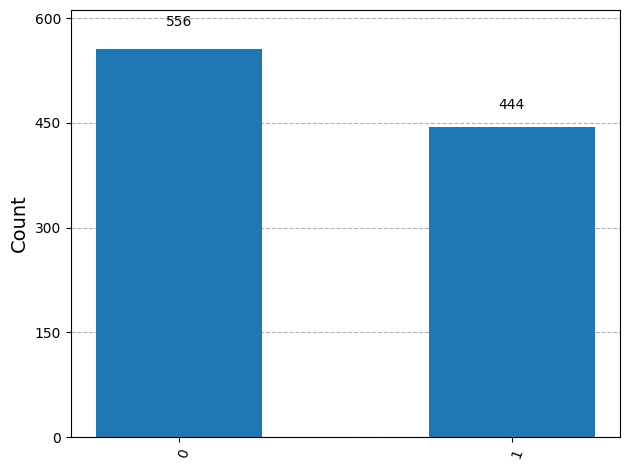

In [51]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

## Operations
Unitary operations can be defined in Qiskit using the `Operator` class. This has a `draw()` method that's similar to `Statevector`'s.

In [52]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])  # The Pauli Y operation (also known as sigma y).
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])  # The Hadamard operation.
S = Operator([[1, 0], [0, 1.0j]])  # The P_π/2 phase operation.
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])  # The P_π/4 phase operation.

display(T.draw("latex"))

<IPython.core.display.Latex object>

We can apply a unitary operation to a state vector using the `Statevector.evolve()` method:

In [53]:
v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw("latex"))

<IPython.core.display.Latex object>

### Basic quantum circuits
Quantum circuits are introduced fully in [Lesson 03](https://www.youtube.com/watch?v=30U2DTfIrOU&list=PLOFEBzvs-VvqKKMXX4vbi4EB1uaErFMSO) but we can start to examine them here by composing unitary operations. To do this, we use Qiskit's `QuantumCircuit` class:

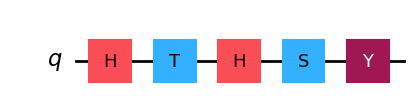

In [ ]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)  # 1 specifies that we are using a single qubit.

# In the commands below, 0 specifies that we want to use the first available qubit (which in this case is also the only available one).
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output="mpl"))  # mpl specifies that we want to use Qiskit's matplotlib renderer.

We can see the matrix representing the overall composition of the operations by using `Operator.from_circuit()`:

In [56]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

A state vector can be fed into a quantum circuit by calling `evolve()` on the state vector, with the quantum circuit as the argument:

In [58]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

Plotting the output of this (in the same way as we did previously for a single measurement) gives the histogram below. Note that the result is still probabilistic, so the numbers above the histogram bars will change slightly on each run.

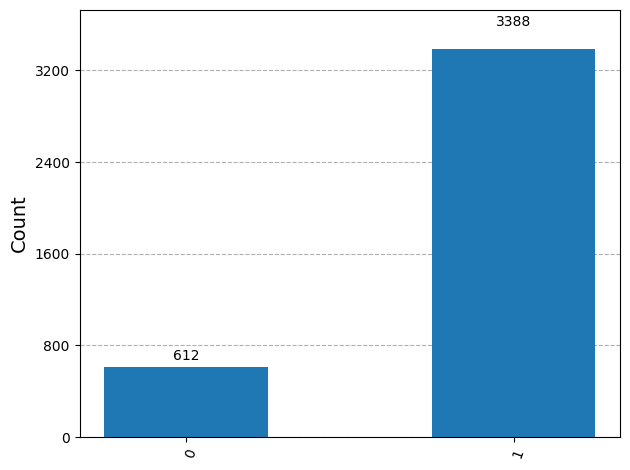

In [64]:
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))